<a href="https://colab.research.google.com/github/SakayanagiTOYOTA/forLLM_edu/blob/main/CLIP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIPを用いた画像判定プログラム

参考HP: https://github.com/openai/CLIP

In [5]:
#Google Colaboの場合はライブラリをインストール
!pip install torch
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hk01jmkp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hk01jmkp
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=dabc34119971e84cf87d5602a9d2a61e2b50370bc19f0292e1a237a210c54633
  Stored in directory: /tmp/pip-ephem-wheel-cache-adcd9kls/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


## CLIPモデルの作成
Google Colaboの場合はメニューの \[ランタイム\] ⇒ \[ランタイムのタイプを変更\]からGPUを選択することができる

In [7]:
import torch
import clip
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device,"で計算します")

model, preprocess = clip.load("ViT-B/32", device=device)

cuda で計算します


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 77.6MiB/s]


画像を判定するプログラム

In [8]:
import clip
from PIL import Image

def is_highway(image_path, text_list):

    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    text = clip.tokenize(text_list).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features  = model.encode_text(text)
        text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        return text_probs

画像リスト
Google Colaboの場合は先に画像ファイルをアップロードしてください

In [38]:
images = ["kousoku.png","jutaku.png", "panorama.png","akuro1.png","akuro2.png"]
lst = ["highway", "freeway","street","bad road"]

kousoku.png : tensor([[1., 0., 0., 0.]], device='cuda:0', dtype=torch.float16)
highway


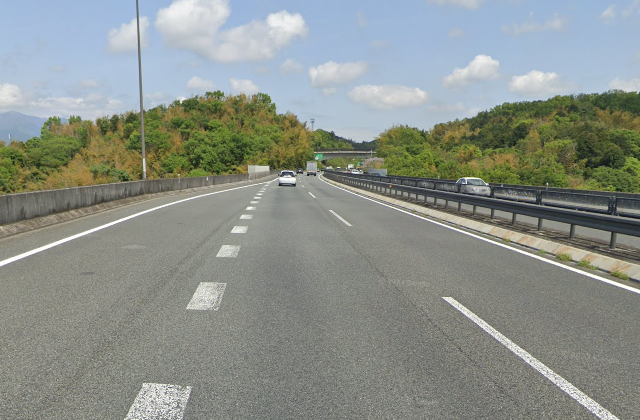




jutaku.png : tensor([[0., 0., 1., 0.]], device='cuda:0', dtype=torch.float16)
street


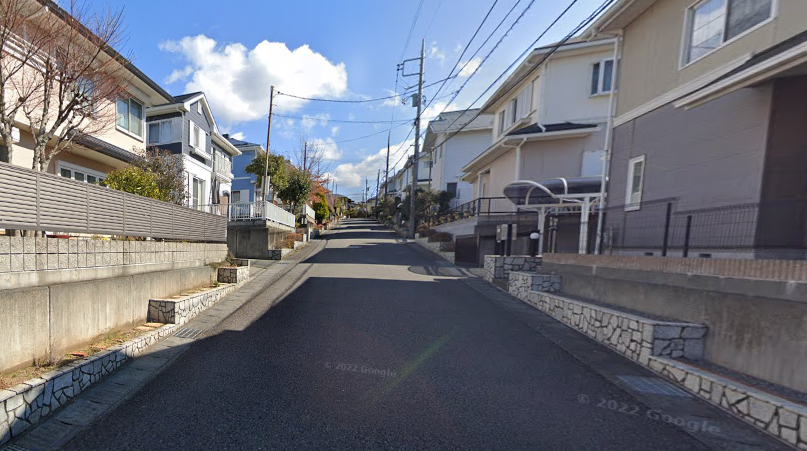




panorama.png : tensor([[1., 0., 0., 0.]], device='cuda:0', dtype=torch.float16)
highway


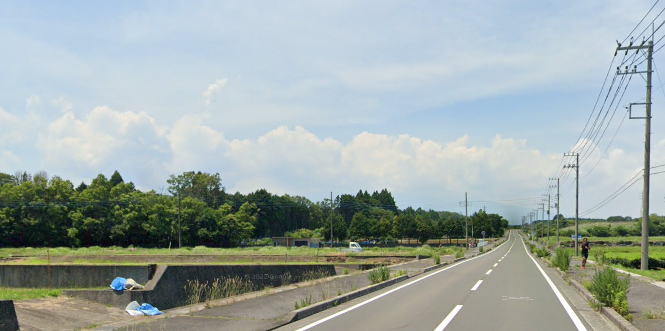




akuro1.png : tensor([[0., 0., 1., 0.]], device='cuda:0', dtype=torch.float16)
street


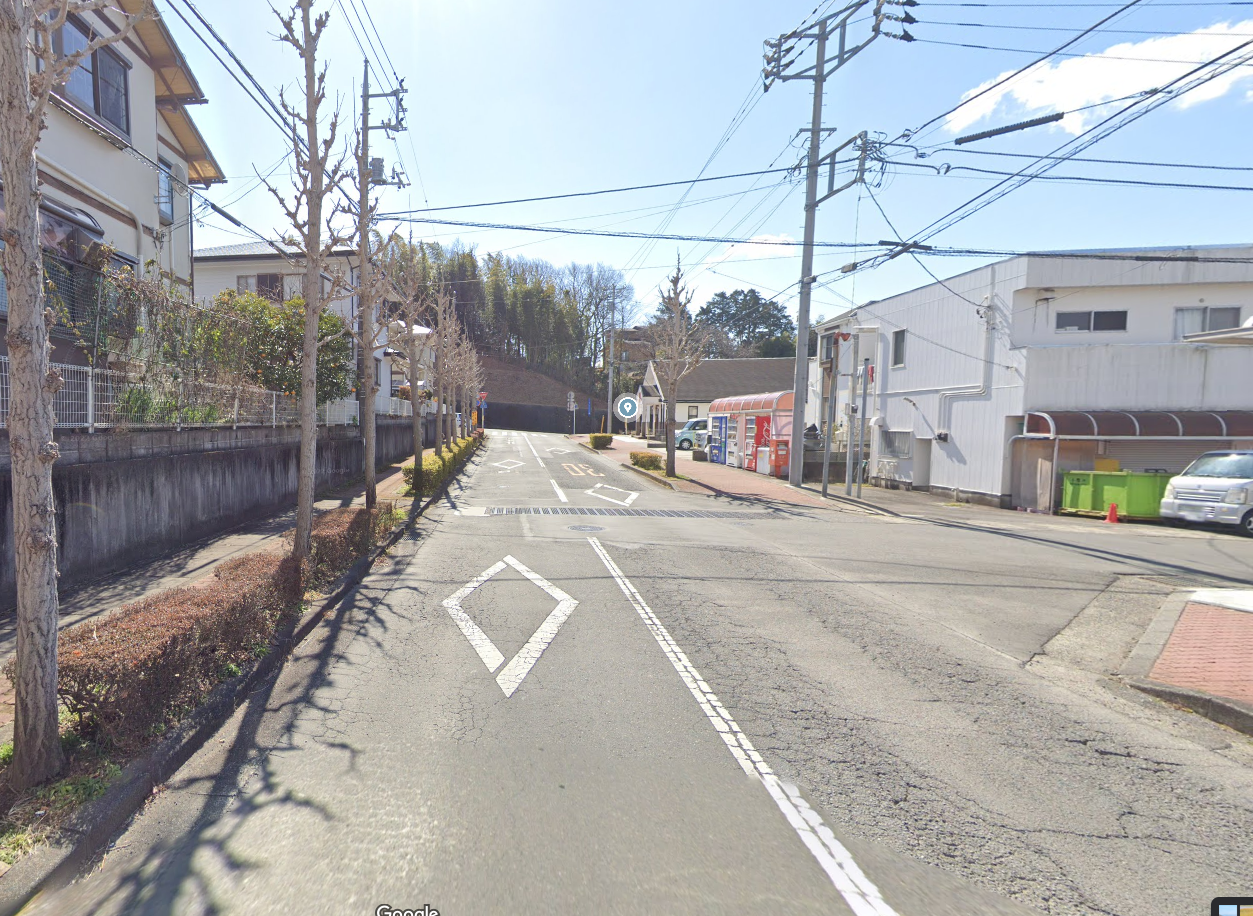




akuro2.png : tensor([[0., 0., 0., 1.]], device='cuda:0', dtype=torch.float16)
bad road


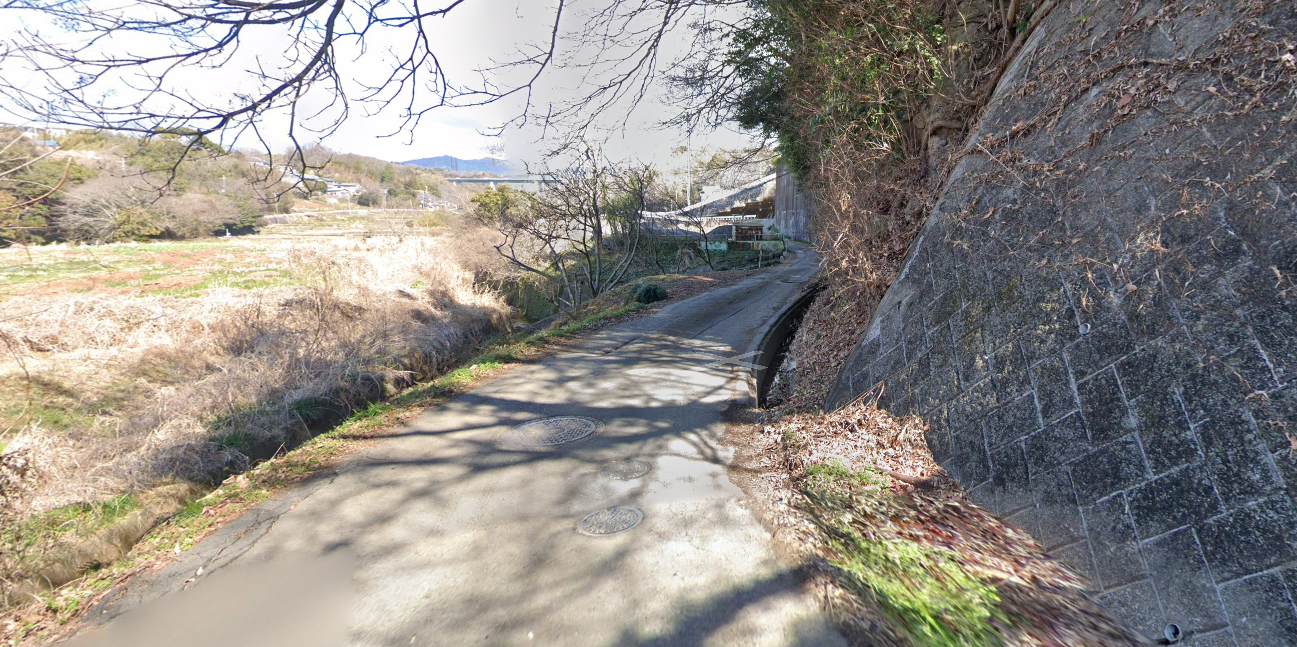

In [44]:
for image in images:
    tnsr= is_highway(image, lst)
    chk = tnsr[0].tolist()
    print(image,":",tnsr)

    jg = lst[chk.index(max(chk))]
    print(jg)
    img = Image.open(image)
    display(img)
    print("\n\n")

In [42]:
img = Image.open(image)
img.show()